In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_X = pd.read_csv("data/train_X.csv")
train_y = pd.read_csv("data/train_y.csv")
test_X = pd.read_csv("data/test_X.csv")
test_y = pd.read_csv("data/test_y.csv")

# Train & test model

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [12]:
scaler = StandardScaler()

In [13]:
neural_model = MLPRegressor(
    hidden_layer_sizes=(150,100,50),
    activation="relu",
    solver="lbfgs",
    alpha=0.01,
    max_iter=300,
    random_state=42,
    verbose=True
)

In [14]:
neural_model.fit(train_X, train_y)

D:\Software\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=0.01, hidden_layer_sizes=(150, 100, 50), max_iter=300,
             random_state=42, solver='lbfgs', verbose=True)

In [15]:
pred = neural_model.predict(test_X)

In [16]:
def rmse(actual, predict):
    mse = metrics.mean_squared_error(actual, predict)
    return np.sqrt(mse)

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(pred, test_y))
print('Mean Squared Error:', metrics.mean_squared_error(pred, test_y))
print('Root Mean Squared Error:', rmse(pred, test_y))

Mean Absolute Error: 0.6314163474034222
Mean Squared Error: 1.0881907671606306
Root Mean Squared Error: 1.0431638256576148


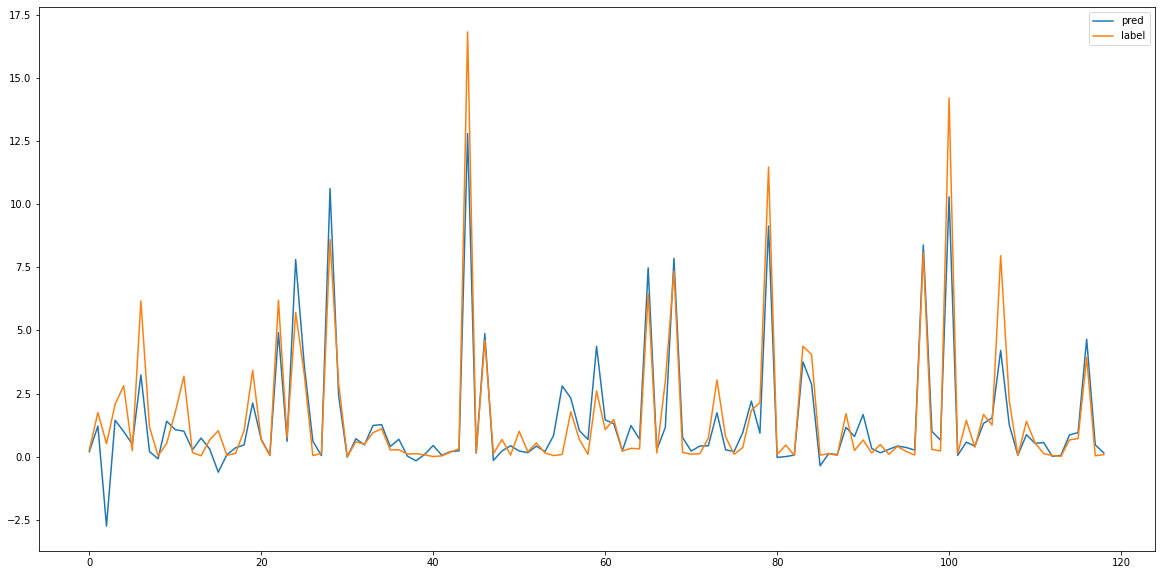

In [31]:
test_df = pd.DataFrame({"pred": pred, "label": test_y.values.ravel()})
test_df.plot(figsize=(20, 10))
plt.show()

In [32]:
test_df

,pred,label
0,0.196470,0.265150
1,1.211312,1.745166
2,-2.753551,0.510384
3,1.442610,2.072755
4,0.994650,2.813698
...,...,...
114,0.860467,0.661890
115,0.951337,0.714985
116,4.654862,3.935045
117,0.464123,0.032863
